## Part 1: Selecting and analyzing the dataset

### Import all the dependencies and libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder,  MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split


### Dataset Ames Housing

In [2]:
data = pd.read_csv('AmesHousing.csv')

print(data.head())

print("\nAmes Housing file:")
print(data.info())

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

### Missing Null values (Clean the dataset)

In [3]:
df = pd.read_csv("AmesHousing.csv")

df_clean = df.dropna(axis=1)

print(f"Original: {df.shape[1]}")
print(f"Clean code of NaN: {df_clean.shape[1]}")
print("\nClean dataset:")
print(df_clean.columns)

print(df.head())
print(df.columns)
print(df.dtypes)
print(df.info())

Original: 82
Clean code of NaN: 55

Clean dataset:
Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Exter Qual', 'Exter Cond', 'Foundation', 'Heating',
       'Heating QC', 'Central Air', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd',
       'Functional', 'Fireplaces', 'Paved Drive', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'Sale Type',
       'Sale Condition', 'SalePrice'],
      dtype='object')
   Order        PID  MS SubClass MS Zoning  Lot Fr

### Correlation Check & Feature Decision

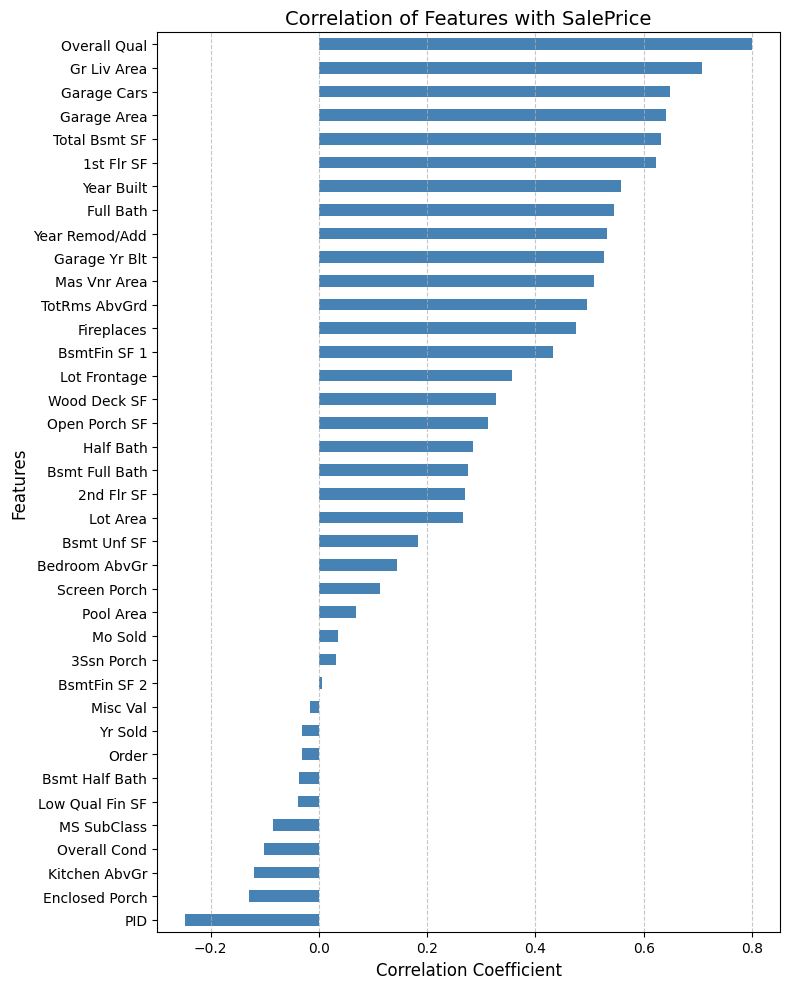

In [4]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

corr_with_price = numeric_df.corr()['SalePrice'].sort_values(ascending=True)

plt.figure(figsize=(8, 10))
corr_with_price.drop('SalePrice').plot(kind='barh', color='steelblue')

plt.title('Correlation of Features with SalePrice', fontsize=14)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



### Encode Categorical Variables

In [5]:

df = pd.read_csv("AmesHousing.csv")
# Check the colums
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(exclude=['object']).columns.tolist()
print(f"Categorical: {len(cat_cols)}")
print(f"Number: {len(num_cols)}")

# Show the unique values
for col in cat_cols:
    print(f"{col}: {df[col].unique()}\n")

# Define the Ordinal Encoding
ordinal_mappings = {
    "Lot Shape":         ["IR3", "IR2", "IR1", "Reg"],
    "Land Slope":        ["Sev", "Mod", "Gtl"],
    "Exter Qual":        ["Po", "Fa", "TA", "Gd", "Ex"],
    "Exter Cond":        ["Po", "Fa", "TA", "Gd", "Ex"],
    "Bsmt Qual":         ["None", "Po", "Fa", "TA", "Gd", "Ex"],
    "Bsmt Cond":         ["None", "Po", "Fa", "TA", "Gd", "Ex"],
    "Bsmt Exposure":     ["None", "No", "Mn", "Av", "Gd"],
    "BsmtFin Type 1":    ["None", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
    "BsmtFin Type 2":    ["None", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
    "Heating QC":        ["Po", "Fa", "TA", "Gd", "Ex"],
    "Kitchen Qual":      ["Po", "Fa", "TA", "Gd", "Ex"],
    "Functional":        ["Sal", "Sev", "Maj2", "Maj1", "Mod", "Min2", "Min1", "Typ"],
    "Paved Drive":       ["N", "P", "Y"],
}

# Validate the missing cols
missing_cols = [c for c in ordinal_mappings if c not in df.columns]
if missing_cols:
    raise KeyError(f"Missing cols: {missing_cols}")

# Replace Nan for None
for col, order in ordinal_mappings.items():
    if "None" in order:
        df[col] = df[col].fillna("None")

# Apply the OrdinalEncoder
for col, order in ordinal_mappings.items():
    oe = OrdinalEncoder(categories=[order])
    df[[col]] = oe.fit_transform(df[[col]])
    
# Change float to integer
df[list(ordinal_mappings.keys())] = df[list(ordinal_mappings.keys())].astype(int)

# One-Hot Encoding for the other categories
onehot_features = [
    "MS Zoning", "Street", "Land Contour", "Utilities", "Lot Config",
    "Neighborhood", "Condition 1", "Condition 2", "Bldg Type", "House Style",
    "Roof Style", "Roof Matl", "Exterior 1st", "Exterior 2nd", "Foundation",
    "Heating", "Central Air", "Electrical", "Sale Type", "Sale Condition"
]

ohe = OneHotEncoder(drop="first", sparse_output=False)
encoded = ohe.fit_transform(df[onehot_features])

encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(onehot_features), index=df.index)

df = pd.concat([df.drop(columns=onehot_features), encoded_df], axis=1)

# Results
print(df.columns[:20])  
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None)    

df.head(20)



Categorical: 43
Number: 39
MS Zoning: ['RL' 'RH' 'FV' 'RM' 'C (all)' 'I (all)' 'A (agr)']

Street: ['Pave' 'Grvl']

Alley: [nan 'Pave' 'Grvl']

Lot Shape: ['IR1' 'Reg' 'IR2' 'IR3']

Land Contour: ['Lvl' 'HLS' 'Bnk' 'Low']

Utilities: ['AllPub' 'NoSewr' 'NoSeWa']

Lot Config: ['Corner' 'Inside' 'CulDSac' 'FR2' 'FR3']

Land Slope: ['Gtl' 'Mod' 'Sev']

Neighborhood: ['NAmes' 'Gilbert' 'StoneBr' 'NWAmes' 'Somerst' 'BrDale' 'NPkVill'
 'NridgHt' 'Blmngtn' 'NoRidge' 'SawyerW' 'Sawyer' 'Greens' 'BrkSide'
 'OldTown' 'IDOTRR' 'ClearCr' 'SWISU' 'Edwards' 'CollgCr' 'Crawfor'
 'Blueste' 'Mitchel' 'Timber' 'MeadowV' 'Veenker' 'GrnHill' 'Landmrk']

Condition 1: ['Norm' 'Feedr' 'PosN' 'RRNe' 'RRAe' 'Artery' 'PosA' 'RRAn' 'RRNn']

Condition 2: ['Norm' 'Feedr' 'PosA' 'PosN' 'Artery' 'RRNn' 'RRAe' 'RRAn']

Bldg Type: ['1Fam' 'TwnhsE' 'Twnhs' 'Duplex' '2fmCon']

House Style: ['1Story' '2Story' '1.5Fin' 'SFoyer' 'SLvl' '2.5Unf' '1.5Unf' '2.5Fin']

Roof Style: ['Hip' 'Gable' 'Mansard' 'Gambrel' 'Shed' 'Flat

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Alley,Lot Shape,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,SalePrice,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_nan,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,1,526301100,20,141.0,31770,NaN,2,2,6,5,1960,1960,Stone,112.0,2,2,3,4,4,4,639.0,1,0.0,441.0,1080.0,1,1656,0,0,1656,1.0,0.0,1,0,3,1,2,7,7,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,1,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,215000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,

In [6]:
print(df.duplicated().sum())
df = df.drop_duplicates()

0


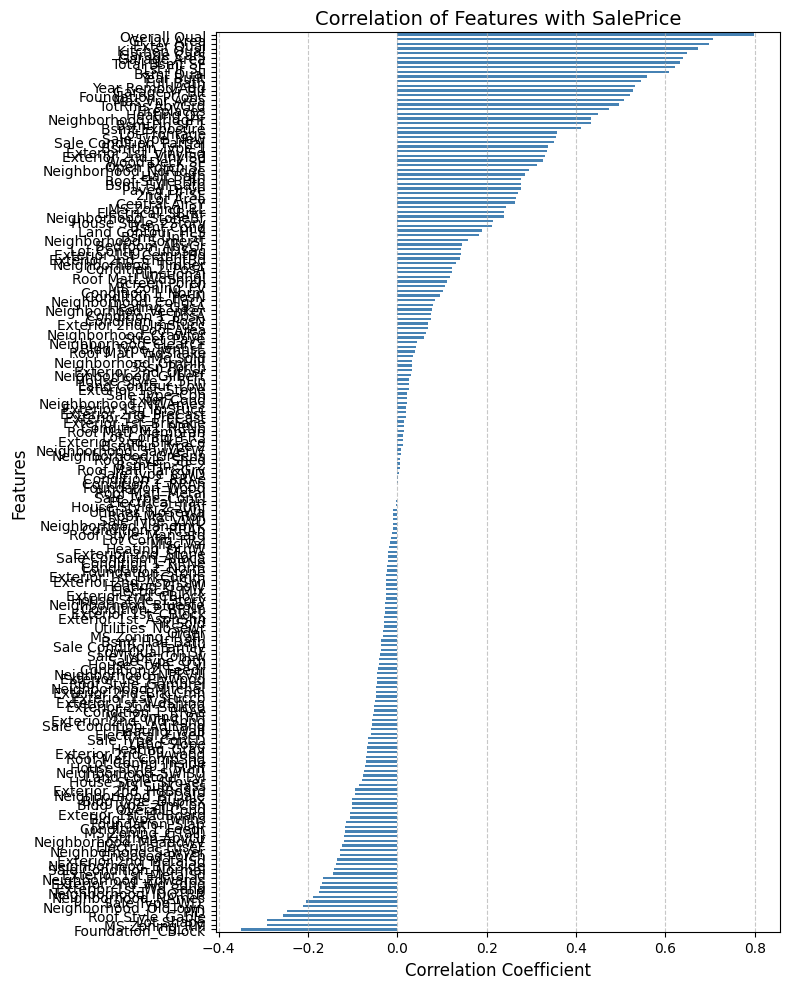

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Columns: 204 entries, Order to Sale Condition_Partial
dtypes: float64(153), int64(41), object(10)
memory usage: 4.6+ MB
None


In [7]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

corr_with_price = numeric_df.corr()['SalePrice'].sort_values(ascending=True)

plt.figure(figsize=(8, 10))
corr_with_price.drop('SalePrice').plot(kind='barh', color='steelblue')

plt.title('Correlation of Features with SalePrice', fontsize=14)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(df.info())

In [8]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_with_price = numeric_df.corr(numeric_only=True)['SalePrice']

summary_df = pd.DataFrame({
    'DataType': df.dtypes.astype(str),
    'CorrelationWithSalePrice': corr_with_price,
})

summary_df['Correlation (%)'] = summary_df['CorrelationWithSalePrice'] * 100

summary_df['CorrelationWithSalePrice'] = summary_df['CorrelationWithSalePrice'].fillna(0)
summary_df['Correlation (%)'] = summary_df['Correlation (%)'].fillna(0)

summary_df = summary_df.sort_values(by='CorrelationWithSalePrice', ascending=True)

pd.set_option('display.max_rows', None)
display(summary_df)

print(df.info())


,DataType,CorrelationWithSalePrice,Correlation (%)
Foundation_CBlock,float64,-0.349642,-34.964194
MS Zoning_RM,float64,-0.292590,-29.259021
Lot Shape,int64,-0.291420,-29.142030
Roof Style_Gable,float64,-0.256250,-25.625016
PID,int64,-0.246521,-24.652121
Neighborhood_OldTown,float64,-0.211944,-21.194442
Sale Type_WD,float64,-0.204369,-20.436931
Neighborhood_NAmes,float64,-0.188632,-18.863235
Neighborhood_IDOTRR,float64,-0.174641,-17.464074
Exterior 1st_Wd Sdng,float64,-0.173256,-17.325617


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Columns: 204 entries, Order to Sale Condition_Partial
dtypes: float64(153), int64(41), object(10)
memory usage: 4.6+ MB
None


In [9]:
correlation = df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)
correlation

SalePrice                 1.000000
Overall Qual              0.799262
Gr Liv Area               0.706780
Exter Qual                0.697970
Kitchen Qual              0.672914
Garage Cars               0.647877
Garage Area               0.640401
Total Bsmt SF             0.632280
1st Flr SF                0.621676
Bsmt Qual                 0.607532
Year Built                0.558426
Full Bath                 0.545604
Year Remod/Add            0.532974
Garage Yr Blt             0.526965
Foundation_PConc          0.520966
Mas Vnr Area              0.508285
TotRms AbvGrd             0.495474
Fireplaces                0.474558
Heating QC                0.450325
Neighborhood_NridgHt      0.433299
BsmtFin SF 1              0.432914
Bsmt Exposure             0.411471
Lot Frontage              0.357318
Sale Type_New             0.354292
Sale Condition_Partial    0.350122
BsmtFin Type 1            0.336965
Exterior 1st_VinylSd      0.334416
Exterior 2nd_VinylSd      0.331146
Wood Deck SF        

### Removing irrelevant and redundant features

In [10]:
neg_corr_features = correlation[correlation < 0].index.tolist()

print("Columns with negative correlation regards the SalePrice:")
print(neg_corr_features)

Columns with negative correlation regards the SalePrice:
['Roof Matl_Metal', 'Sale Type_ConLI', 'Electrical_nan', 'House Style_2.5Unf', 'Utilities_NoSeWa', 'Roof Matl_Roll', 'Sale Type_VWD', 'Neighborhood_Landmrk', 'Condition 2_RRAn', 'Roof Style_Mansard', 'Lot Config_FR2', 'Misc Val', 'Heating_OthW', 'Exterior 2nd_Stone', 'Sale Condition_Alloca', 'Condition 1_RRNe', 'Condition 2_Norm', 'Foundation_Stone', 'Exterior 1st_BrkComm', 'Exterior 2nd_AsphShn', 'Heating_GasW', 'Electrical_Mix', 'Exterior 2nd_CBlock', 'House Style_1Story', 'Neighborhood_Blueste', 'Condition 2_RRNn', 'Exterior 1st_CBlock', 'Exterior 1st_AsphShn', 'Yr Sold', 'Utilities_NoSewr', 'Order', 'MS Zoning_I (all)', 'Bsmt Half Bath', 'Sale Condition_Family', 'Low Qual Fin SF', 'Sale Type_ConLw', 'Sale Type_Oth', 'House Style_SLvl', 'Condition 2_Feedr', 'Neighborhood_NPkVill', 'Exterior 1st_Plywood', 'Roof Style_Gambrel', 'Neighborhood_Mitchel', 'Exterior 2nd_Brk Cmn', 'Exterior 1st_Stucco', 'Exterior 1st_WdShing', 'Exteri

In [11]:
df = df.drop(columns=neg_corr_features)
print(f"Erased: {len(neg_corr_features)} negative categorical correlation")

print(df.columns[:20])
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None)    

df.head(20)

Erased: 95 negative categorical correlation
Index(['Lot Frontage', 'Lot Area', 'Alley', 'Overall Qual', 'Year Built',
       'Year Remod/Add', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating QC'],
      dtype='object')


,Lot Frontage,Lot Area,Alley,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Mo Sold,SalePrice,MS Zoning_FV,MS Zoning_RL,Street_Pave,Land Contour_HLS,Land Contour_Low,Lot Config_CulDSac,Lot Config_FR3,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAn,Condition 1_RRNn,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Bldg Type_TwnhsE,House Style_2.5Fin,House Style_2Story,Roof Style_Hip,Roof Style_Shed,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_BrkFace,Exterior 1st_CemntBd,Exterior 1st_ImStucc,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_VinylSd,Exterior 2nd_BrkFace,Exterior 2nd_CmentBd,Exterior 2nd_ImStucc,Exterior 2nd_Other,Exterior 2nd_PreCast,Exterior 2nd_VinylSd,Foundation_PConc,Foundation_Wood,Heating_GasA,Central Air_Y,Electrical_SBrkr,Sale Type_CWD,Sale Type_Con,Sale Type_New,Sale Condition_Partial
0,141.0,31770,NaN,6,1960,1960,Stone,112.0,2,2,3,4,4,4,639.0,1,0.0,441.0,1080.0,1,1656,0,1656,1.0,1,0,3,2,7,7,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,1,210,62,0,0,0,NaN,NaN,NaN,5,215000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1,80.0,11622,NaN,5,1961,1961,NaN,0.0,2,2,3,3,1,3,468.0,2,144.0,270.0,882.0,2,896,0,896,0.0,1,0,2,2,5,7,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,2,140,0,0,120,0,NaN,MnPrv,NaN,6,105000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2,81.0,14267,NaN,6,1958,1958,BrkFace,108.0,2,2,3,3,1,5,923.0,1,0.0,406.0,1329.0,2,1329,0,1329,0.0,1,1,3,3,6,7,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,2,393,36,0,0,0,NaN,NaN,Gar2,6,172000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3,93.0,11160,NaN,7,1968,1968,NaN,0.0,3,2,3,3,1,5,1065.0,1,0.0,1045.0,2110.0,4,2110,0,2110,1.0,2,1,3,4,8,7,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,2,0,0,0,0,0,NaN,NaN,NaN,4,244000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
4,74.0,13830,NaN,5,1997,1998,NaN,0.0,2,2,4,3,1,6,791.0,1,0.0,137.0,928.0,3,928,701,1629,0.0,2,1,3,2,6,7,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,2,212,34,0,0,0,NaN,MnPrv,NaN,3,189900,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
5,78.0,9978,NaN,6,1998,1998,BrkFace,20.0,2,2,3,3,1,6,602.0,1,0.0,324.0,926.0,4,926,678,1604,0.0,2,1,3,3,7,7,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,2,360,36,0,0,0,NaN,NaN,NaN,6,195500,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.

In [12]:
# Remove duplicates
print(df.duplicated().sum())
df = df.drop_duplicates()

# Results
print(df.columns[:20])
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None)    

df.head(20)

0
Index(['Lot Frontage', 'Lot Area', 'Alley', 'Overall Qual', 'Year Built',
       'Year Remod/Add', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating QC'],
      dtype='object')


,Lot Frontage,Lot Area,Alley,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Mo Sold,SalePrice,MS Zoning_FV,MS Zoning_RL,Street_Pave,Land Contour_HLS,Land Contour_Low,Lot Config_CulDSac,Lot Config_FR3,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAn,Condition 1_RRNn,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Bldg Type_TwnhsE,House Style_2.5Fin,House Style_2Story,Roof Style_Hip,Roof Style_Shed,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_BrkFace,Exterior 1st_CemntBd,Exterior 1st_ImStucc,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_VinylSd,Exterior 2nd_BrkFace,Exterior 2nd_CmentBd,Exterior 2nd_ImStucc,Exterior 2nd_Other,Exterior 2nd_PreCast,Exterior 2nd_VinylSd,Foundation_PConc,Foundation_Wood,Heating_GasA,Central Air_Y,Electrical_SBrkr,Sale Type_CWD,Sale Type_Con,Sale Type_New,Sale Condition_Partial
0,141.0,31770,NaN,6,1960,1960,Stone,112.0,2,2,3,4,4,4,639.0,1,0.0,441.0,1080.0,1,1656,0,1656,1.0,1,0,3,2,7,7,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,1,210,62,0,0,0,NaN,NaN,NaN,5,215000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1,80.0,11622,NaN,5,1961,1961,NaN,0.0,2,2,3,3,1,3,468.0,2,144.0,270.0,882.0,2,896,0,896,0.0,1,0,2,2,5,7,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,2,140,0,0,120,0,NaN,MnPrv,NaN,6,105000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2,81.0,14267,NaN,6,1958,1958,BrkFace,108.0,2,2,3,3,1,5,923.0,1,0.0,406.0,1329.0,2,1329,0,1329,0.0,1,1,3,3,6,7,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,2,393,36,0,0,0,NaN,NaN,Gar2,6,172000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3,93.0,11160,NaN,7,1968,1968,NaN,0.0,3,2,3,3,1,5,1065.0,1,0.0,1045.0,2110.0,4,2110,0,2110,1.0,2,1,3,4,8,7,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,2,0,0,0,0,0,NaN,NaN,NaN,4,244000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
4,74.0,13830,NaN,5,1997,1998,NaN,0.0,2,2,4,3,1,6,791.0,1,0.0,137.0,928.0,3,928,701,1629,0.0,2,1,3,2,6,7,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,2,212,34,0,0,0,NaN,MnPrv,NaN,3,189900,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
5,78.0,9978,NaN,6,1998,1998,BrkFace,20.0,2,2,3,3,1,6,602.0,1,0.0,324.0,926.0,4,926,678,1604,0.0,2,1,3,3,7,7,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,2,360,36,0,0,0,NaN,NaN,NaN,6,195500,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.

### Standardization or Normalization: RobustScaler

In [13]:
num_cols_original = [
    col for col in df.columns
    if col not in onehot_features + list(ordinal_mappings.keys()) + ['SalePrice']
]

# Filter only numerical "real" values
num_cols_real = df[num_cols_original].select_dtypes(include=['int64', 'float64']).columns.tolist()

# Apply the scale only for the columns
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df[num_cols_real] = scaler.fit_transform(df[num_cols_real])

print(f" Scaled {len(num_cols_real)} real numerical columns")


 Scaled 87 real numerical columns


In [14]:
# Show the new dataset with standarization

print(df.columns[:20])
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None)    

df.head(20)

Index(['Lot Frontage', 'Lot Area', 'Alley', 'Overall Qual', 'Year Built',
       'Year Remod/Add', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating QC'],
      dtype='object')


,Lot Frontage,Lot Area,Alley,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Mo Sold,SalePrice,MS Zoning_FV,MS Zoning_RL,Street_Pave,Land Contour_HLS,Land Contour_Low,Lot Config_CulDSac,Lot Config_FR3,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAn,Condition 1_RRNn,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Bldg Type_TwnhsE,House Style_2.5Fin,House Style_2Story,Roof Style_Hip,Roof Style_Shed,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_BrkFace,Exterior 1st_CemntBd,Exterior 1st_ImStucc,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_VinylSd,Exterior 2nd_BrkFace,Exterior 2nd_CmentBd,Exterior 2nd_ImStucc,Exterior 2nd_Other,Exterior 2nd_PreCast,Exterior 2nd_VinylSd,Foundation_PConc,Foundation_Wood,Heating_GasA,Central Air_Y,Electrical_SBrkr,Sale Type_CWD,Sale Type_Con,Sale Type_New,Sale Condition_Partial
0,3.318182,5.427339,NaN,0.0,-0.276596,-0.846154,Stone,0.682927,2,2,3,4,4,4,0.366485,1,0.0,-0.042882,0.176817,1,1.126539,0.000000,0.346980,1.0,-1.0,0.0,0.0,2,0.5,7,1.0,Gd,Attchd,-0.452381,Fin,0.0,0.187500,TA,TA,1,1.250000,0.500000,0.0,0.0,0.0,NaN,NaN,NaN,-0.25,215000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.545455,0.531106,NaN,-0.5,-0.255319,-0.820513,NaN,0.000000,2,2,3,3,1,3,0.133515,2,144.0,-0.336192,-0.212181,2,-0.370261,0.000000,-0.885286,0.0,-1.0,0.0,-1.0,2,-0.5,7,-1.0,NaN,Attchd,-0.428571,Unf,-1.0,0.976562,TA,TA,2,0.833333,-0.385714,0.0,120.0,0.0,NaN,MnPrv,NaN,0.00,105000,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.590909,1.173876,NaN,0.0,-0.319149,-0.897436,BrkFace,0.658537,2,2,3,3,1,5,0.753406,1,0.0,-0.102916,0.666012,2,0.482521,0.000000,-0.183218,0.0,-1.0,1.0,0.0,3,0.0,7,-1.0,NaN,Attchd,-0.500000,Unf,-1.0,-0.656250,TA,TA,2,2.339286,0.128571,0.0,0.0,0.0,NaN,NaN,Gar2,0.00,172000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.136364,0.418834,NaN,0.5,-0.106383,-0.641026,NaN,0.000000,3,2,3,3,1,5,0.946866,1,0.0,0.993139,2.200393,4,2.020679,0.000000,1.083097,1.0,0.0,1.0,0.0,4,1.0,7,1.0,TA,Attchd,-0.261905,Fin,0.0,0.164062,TA,TA,2,0.000000,-0.385714,0.0,0.0,0.0,NaN,NaN,NaN,-0.50,244000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.272727,1.067679,NaN,-0.5,0.510638,0.128205,NaN,0.000000,2,2,4,3,1,6,0.573569,1,0.0,-0.564322,-0.121807,3,-0.307238,0.996092,0.303202,0.0,0.0,1.0,0.0,2,0.0,7,0.0,TA,Attchd,0.428571,Fin,0.0,0.007812,TA,TA,2,1.261905,0.100000,0.0,0.0,0.0,NaN,MnPrv,NaN,-0.75,189900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [15]:
# Save cleaned dataset

df.to_csv("AmesHousing_preprocessing.csv", index=False)
print("Cleaned dataset saved successfully!")

Cleaned dataset saved successfully!


### Ames Housing Preprocessing File

In [16]:
data = pd.read_csv('AmesHousing_preprocessing.csv')

print(data.head())

print("\nAmes Housing Preprocessing file:")
print(data.info())
print(df.columns[:20])
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None)    

df.head(20)

   Lot Frontage  Lot Area Alley  Overall Qual  Year Built  Year Remod/Add  \
0      3.318182  5.427339   NaN           0.0   -0.276596       -0.846154   
1      0.545455  0.531106   NaN          -0.5   -0.255319       -0.820513   
2      0.590909  1.173876   NaN           0.0   -0.319149       -0.897436   
3      1.136364  0.418834   NaN           0.5   -0.106383       -0.641026   
4      0.272727  1.067679   NaN          -0.5    0.510638        0.128205   

  Mas Vnr Type  Mas Vnr Area  Exter Qual  Exter Cond  Bsmt Qual  Bsmt Cond  \
0        Stone      0.682927           2           2          3          4   
1          NaN      0.000000           2           2          3          3   
2      BrkFace      0.658537           2           2          3          3   
3          NaN      0.000000           3           2          3          3   
4          NaN      0.000000           2           2          4          3   

   Bsmt Exposure  BsmtFin Type 1  BsmtFin SF 1  BsmtFin Type 2  Bsmt

,Lot Frontage,Lot Area,Alley,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Mo Sold,SalePrice,MS Zoning_FV,MS Zoning_RL,Street_Pave,Land Contour_HLS,Land Contour_Low,Lot Config_CulDSac,Lot Config_FR3,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAn,Condition 1_RRNn,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Bldg Type_TwnhsE,House Style_2.5Fin,House Style_2Story,Roof Style_Hip,Roof Style_Shed,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_BrkFace,Exterior 1st_CemntBd,Exterior 1st_ImStucc,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_VinylSd,Exterior 2nd_BrkFace,Exterior 2nd_CmentBd,Exterior 2nd_ImStucc,Exterior 2nd_Other,Exterior 2nd_PreCast,Exterior 2nd_VinylSd,Foundation_PConc,Foundation_Wood,Heating_GasA,Central Air_Y,Electrical_SBrkr,Sale Type_CWD,Sale Type_Con,Sale Type_New,Sale Condition_Partial
0,3.318182,5.427339,NaN,0.0,-0.276596,-0.846154,Stone,0.682927,2,2,3,4,4,4,0.366485,1,0.0,-0.042882,0.176817,1,1.126539,0.000000,0.346980,1.0,-1.0,0.0,0.0,2,0.5,7,1.0,Gd,Attchd,-0.452381,Fin,0.0,0.187500,TA,TA,1,1.250000,0.500000,0.0,0.0,0.0,NaN,NaN,NaN,-0.25,215000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.545455,0.531106,NaN,-0.5,-0.255319,-0.820513,NaN,0.000000,2,2,3,3,1,3,0.133515,2,144.0,-0.336192,-0.212181,2,-0.370261,0.000000,-0.885286,0.0,-1.0,0.0,-1.0,2,-0.5,7,-1.0,NaN,Attchd,-0.428571,Unf,-1.0,0.976562,TA,TA,2,0.833333,-0.385714,0.0,120.0,0.0,NaN,MnPrv,NaN,0.00,105000,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.590909,1.173876,NaN,0.0,-0.319149,-0.897436,BrkFace,0.658537,2,2,3,3,1,5,0.753406,1,0.0,-0.102916,0.666012,2,0.482521,0.000000,-0.183218,0.0,-1.0,1.0,0.0,3,0.0,7,-1.0,NaN,Attchd,-0.500000,Unf,-1.0,-0.656250,TA,TA,2,2.339286,0.128571,0.0,0.0,0.0,NaN,NaN,Gar2,0.00,172000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.136364,0.418834,NaN,0.5,-0.106383,-0.641026,NaN,0.000000,3,2,3,3,1,5,0.946866,1,0.0,0.993139,2.200393,4,2.020679,0.000000,1.083097,1.0,0.0,1.0,0.0,4,1.0,7,1.0,TA,Attchd,-0.261905,Fin,0.0,0.164062,TA,TA,2,0.000000,-0.385714,0.0,0.0,0.0,NaN,NaN,NaN,-0.50,244000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.272727,1.067679,NaN,-0.5,0.510638,0.128205,NaN,0.000000,2,2,4,3,1,6,0.573569,1,0.0,-0.564322,-0.121807,3,-0.307238,0.996092,0.303202,0.0,0.0,1.0,0.0,2,0.0,7,0.0,TA,Attchd,0.428571,Fin,0.0,0.007812,TA,TA,2,1.261905,0.100000,0.0,0.0,0.0,NaN,MnPrv,NaN,-0.75,189900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

### Splitting the data into Train and Test

In [17]:
# Load the preprocessed dataset
df = pd.read_csv("AmesHousing_preprocessing.csv")

# Separate features (X) and target (y)
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

# Randomly split the data the 80% train and validation, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print("Data")
print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")


Data
Training set: (2344, 108)
Testing set: (586, 108)


### Test and Train

In [18]:
df = pd.read_csv("AmesHousing_preprocessing.csv")

X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

# Split into 80% train/validation and 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# Combine features and target again for saving
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

# Here it saves to CSV files
train_df.to_csv("AmesHousing_train.csv", index=False)
test_df.to_csv("AmesHousing_test.csv", index=False)


In [19]:
train_df = pd.read_csv("AmesHousing_train.csv")
test_df = pd.read_csv("AmesHousing_test.csv")

print(f" Training Data: {train_df.shape[0]} rows × {train_df.shape[1]} columns")
print(f" Testing Data: {test_df.shape[0]} rows × {test_df.shape[1]} columns\n")

print("Train Dataset")
display(train_df.head(10))

print("\nTest Dataset")
display(test_df.head(10))


 Training Data: 2344 rows × 109 columns
 Testing Data: 586 rows × 109 columns

Train Dataset


,Lot Frontage,Lot Area,Alley,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Mo Sold,MS Zoning_FV,MS Zoning_RL,Street_Pave,Land Contour_HLS,Land Contour_Low,Lot Config_CulDSac,Lot Config_FR3,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAn,Condition 1_RRNn,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Bldg Type_TwnhsE,House Style_2.5Fin,House Style_2Story,Roof Style_Hip,Roof Style_Shed,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_BrkFace,Exterior 1st_CemntBd,Exterior 1st_ImStucc,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_VinylSd,Exterior 2nd_BrkFace,Exterior 2nd_CmentBd,Exterior 2nd_ImStucc,Exterior 2nd_Other,Exterior 2nd_PreCast,Exterior 2nd_VinylSd,Foundation_PConc,Foundation_Wood,Heating_GasA,Central Air_Y,Electrical_SBrkr,Sale Type_CWD,Sale Type_Con,Sale Type_New,Sale Condition_Partial,SalePrice
0,0.545455,0.234143,NaN,0.5,0.063830,-0.435897,BrkFace,1.152439,2,2,4,3,1,1,-0.504087,1,0.0,1.070326,0.196464,2,0.563269,0.000000,-0.116741,0.0,0.0,0.0,0.0,2,0.0,7,0.0,TA,Attchd,-0.071429,RFn,0.0,-0.003906,TA,TA,2,0.000000,-0.385714,0.0,0.0,0.0,NaN,MnPrv,NaN,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,152000
1,NaN,4.680802,NaN,-0.5,-0.127660,-0.666667,NaN,0.000000,2,2,3,4,4,2,-0.164850,5,764.0,-0.799314,0.045187,2,0.149680,1.372647,1.109039,0.0,0.0,1.0,0.0,2,0.5,5,-1.0,NaN,Attchd,-0.285714,Fin,0.0,0.226562,TA,TA,2,2.892857,-0.385714,0.0,225.0,0.0,NaN,NaN,NaN,0.00,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,185000
2,0.090909,0.098542,NaN,-1.0,-0.234043,-0.794872,NaN,0.000000,2,2,0,0,0,0,-0.504087,0,0.0,-0.799314,-1.944990,2,0.275726,0.000000,-0.353466,0.0,0.0,0.0,-1.0,2,0.0,7,-1.0,NaN,CarPort,-0.404762,Unf,0.0,-0.070312,TA,TA,2,0.000000,-0.385714,0.0,0.0,0.0,NaN,NaN,NaN,-0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101800
3,-0.363636,-0.543499,NaN,-1.0,-0.510638,-1.102564,NaN,0.000000,2,2,0,0,0,0,-0.504087,0,0.0,-0.799314,-1.944990,1,-0.086657,0.000000,-0.651804,0.0,0.0,0.0,-1.0,2,0.0,7,-1.0,NaN,Detchd,-0.547619,Unf,0.0,-0.234375,TA,TA,2,0.000000,-0.385714,0.0,0.0,0.0,NaN,NaN,NaN,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,90000
4,-0.227273,-0.439733,NaN,-1.0,-1.127660,-1.102564,NaN,0.000000,1,2,2,1,1,1,-0.504087,1,0.0,0.229846,-0.766208,3,0.033481,0.852575,0.419943,0.0,0.0,0.0,1.0,1,1.0,7,-1.0,NaN,NaN,NaN,NaN,-2.0,-1.875000,NaN,NaN,0,0.000000,-0.385714,0.0,0.0,0.0,NaN,NaN,NaN,1.00,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Test Dataset


,Lot Frontage,Lot Area,Alley,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Mo Sold,MS Zoning_FV,MS Zoning_RL,Street_Pave,Land Contour_HLS,Land Contour_Low,Lot Config_CulDSac,Lot Config_FR3,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAn,Condition 1_RRNn,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Bldg Type_TwnhsE,House Style_2.5Fin,House Style_2Story,Roof Style_Hip,Roof Style_Shed,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_BrkFace,Exterior 1st_CemntBd,Exterior 1st_ImStucc,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_VinylSd,Exterior 2nd_BrkFace,Exterior 2nd_CmentBd,Exterior 2nd_ImStucc,Exterior 2nd_Other,Exterior 2nd_PreCast,Exterior 2nd_VinylSd,Foundation_PConc,Foundation_Wood,Heating_GasA,Central Air_Y,Electrical_SBrkr,Sale Type_CWD,Sale Type_Con,Sale Type_New,Sale Condition_Partial,SalePrice
0,NaN,-1.053827,Grvl,1.0,-1.021277,0.076923,NaN,0.000000,2,3,3,3,1,1,-0.504087,1,0.0,0.209262,-0.789784,1,-0.494338,1.183659,0.363194,0.0,-1.0,0.0,0.0,3,0.5,7,0.0,Gd,Detchd,-1.285714,Unf,-1.0,-0.984375,TA,TA,2,1.142857,0.514286,0.0,0.0,0.0,NaN,MnPrv,NaN,0.00,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,161000
1,-2.136364,-1.833900,NaN,0.0,-0.021277,-0.538462,BrkFace,2.317073,2,2,3,3,1,5,-0.119891,1,0.0,-0.435678,-0.974460,4,-1.161989,0.761634,-0.668018,0.0,-1.0,1.0,0.0,2,0.0,7,-1.0,NaN,Detchd,-0.142857,Unf,-1.0,-0.843750,TA,TA,2,0.000000,-0.385714,0.0,0.0,0.0,NaN,NaN,NaN,0.25,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,116000
2,-0.272727,-0.552734,NaN,0.5,0.638298,0.282051,BrkFace,1.158537,3,2,4,3,1,1,-0.504087,1,0.0,0.566038,-0.381139,4,-0.547514,1.304440,0.457236,0.0,0.0,1.0,0.0,3,1.0,7,0.0,Gd,BuiltIn,0.571429,Fin,0.0,0.531250,TA,TA,2,1.000000,0.428571,0.0,0.0,0.0,NaN,NaN,NaN,-0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,196500
3,-0.363636,-0.332078,NaN,-1.0,0.446809,0.051282,NaN,0.000000,2,2,4,3,1,6,0.297003,1,0.0,-0.109777,0.000000,4,-0.185130,0.000000,-0.732874,1.0,-1.0,0.0,0.0,2,-0.5,7,-1.0,NaN,NaN,NaN,NaN,-2.0,-1.875000,NaN,NaN,2,0.000000,-0.385714,0.0,0.0,0.0,NaN,NaN,NaN,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123600
4,-0.818182,-0.592102,NaN,0.0,-1.000000,0.128205,NaN,0.000000,2,3,3,3,1,3,-0.096730,6,40.0,0.152659,-0.188605,2,-0.324963,0.000000,-0.847994,1.0,-1.0,0.0,-1.0,2,-0.5,7,-1.0,NaN,Detchd,-1.261905,Unf,-1.0,-1.113281,TA,TA,1,0.000000,-0.385714,0.0,0.0,0.0,NaN,MnPrv,NaN,0.25,0.0,-1.0,0.0,0.0,0.0,0.0,0.

## Part 2: Implementation of BP

### Define the variables for the BP

In [20]:
import numpy as np

In [21]:
df = pd.read_csv("AmesHousing_preprocessing.csv")
df.select_dtypes(include=['object']).columns


Index(['Alley', 'Mas Vnr Type', 'Fireplace Qu', 'Garage Type', 'Garage Finish',
       'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence', 'Misc Feature'],
      dtype='object')

In [37]:
df = pd.read_csv("AmesHousing_preprocessing.csv")

# find categorical columns that still contain strings
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Columns still categorical:", cat_cols)

# one-hot encode ALL remaining categorical columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# save final clean file
df.to_csv("AmesHousing_preprocessing_FINAL.csv", index=False)

print("Saved cleaned dataset: AmesHousing_preprocessing_FINAL.csv")


Columns still categorical: ['Alley', 'Mas Vnr Type', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence', 'Misc Feature']
Saved cleaned dataset: AmesHousing_preprocessing_FINAL.csv


In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from NeuronalNet import NeuralNet

df = pd.read_csv("AmesHousing_preprocessing_FINAL.csv")

# 1. Split X and y
X = df.drop(columns=["SalePrice"]).values
y = df["SalePrice"].values

# 2. Scale X
sc_X = StandardScaler()
X_scaled = sc_X.fit_transform(X)

# 3. Scale y
sc_y = StandardScaler()
y_scaled = sc_y.fit_transform(y.reshape(-1,1)).ravel()

# 4. Build the network
nn = NeuralNet(
    n_units=[X_scaled.shape[1], 64, 32, 16, 1],
    epochs=200,
    lr=0.001,
    momentum=0.9,
    activation="tanh",
    val_pct=0.2,
    batch_size=32,
    random_state=42
)

# 5. Train
nn.fit(X_scaled, y_scaled)

# 6. Check losses
loss = nn.loss_epochs()
print(loss[-1])



[nan nan]


In [41]:
loss = nn.loss_epochs()
print("Train Loss (last epoch):", loss[-1,0])
print("Validation Loss (last epoch):", loss[-1,1])


Train Loss (last epoch): nan
Validation Loss (last epoch): nan


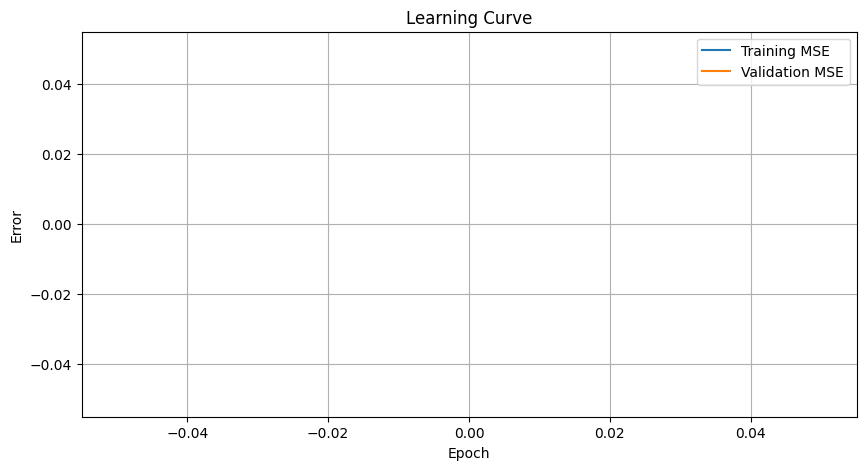

In [42]:
import matplotlib.pyplot as plt

loss = nn.loss_epochs()

plt.figure(figsize=(10,5))
plt.plot(loss[:,0], label="Training MSE")
plt.plot(loss[:,1], label="Validation MSE")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title("Learning Curve")
plt.legend()
plt.grid()
plt.show()


In [26]:
df.isna().sum().sort_values(ascending=False).head(20)


Lot Frontage      490
Garage Yr Blt     159
Mas Vnr Area       23
Bsmt Full Bath      2
Garage Area         1
Garage Cars         1
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
BsmtFin SF 1        1
Lot Area            0
Overall Qual        0
Year Built          0
Bsmt Exposure       0
Bsmt Cond           0
Bsmt Qual           0
BsmtFin Type 1      0
Year Remod/Add      0
Exter Qual          0
Exter Cond          0
dtype: int64

In [27]:
df.select_dtypes(include=['object']).columns


Index([], dtype='object')

In [29]:
df.select_dtypes(include=['object']).columns.tolist()



[]

In [30]:
df["SalePrice"].describe()



count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [31]:
df.select_dtypes(include=['object']).columns.tolist()


[]

In [32]:
df[df.select_dtypes(include=['object']).columns].head()


""
0
1
2
3
4


In [46]:
print("NaNs in DataFrame:")
print(df.isna().sum().sum())

print("\nNaNs per column:")
print(df.isna().sum())

print("\nColumns that are not numeric:")
non_numeric = df.select_dtypes(exclude=[np.number]).columns
print(non_numeric)



NaNs in DataFrame:
680

NaNs per column:
Lot Frontage              490
Lot Area                    0
Overall Qual                0
Year Built                  0
Year Remod/Add              0
Mas Vnr Area               23
Exter Qual                  0
Exter Cond                  0
Bsmt Qual                   0
Bsmt Cond                   0
Bsmt Exposure               0
BsmtFin Type 1              0
BsmtFin SF 1                1
BsmtFin Type 2              0
BsmtFin SF 2                1
Bsmt Unf SF                 1
Total Bsmt SF               1
Heating QC                  0
1st Flr SF                  0
2nd Flr SF                  0
Gr Liv Area                 0
Bsmt Full Bath              2
Full Bath                   0
Half Bath                   0
Bedroom AbvGr               0
Kitchen Qual                0
TotRms AbvGrd               0
Functional                  0
Fireplaces                  0
Garage Yr Blt             159
Garage Cars                 1
Garage Area                 1

In [47]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Columns: 132 entries, Lot Frontage to Misc Feature_TenC
dtypes: bool(33), float64(87), int64(12)
memory usage: 2.3 MB


In [48]:
# Convert all "object" columns to numeric using 0/1
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].astype("category").cat.codes


In [49]:
df = df.fillna(0)


In [50]:
print("NaNs:", df.isna().sum().sum())
print("Objects:", len(df.select_dtypes(include=['object']).columns))
print(df.dtypes)


NaNs: 0
Objects: 0
Lot Frontage              float64
Lot Area                  float64
Overall Qual              float64
Year Built                float64
Year Remod/Add            float64
Mas Vnr Area              float64
Exter Qual                  int64
Exter Cond                  int64
Bsmt Qual                   int64
Bsmt Cond                   int64
Bsmt Exposure               int64
BsmtFin Type 1              int64
BsmtFin SF 1              float64
BsmtFin Type 2              int64
BsmtFin SF 2              float64
Bsmt Unf SF               float64
Total Bsmt SF             float64
Heating QC                  int64
1st Flr SF                float64
2nd Flr SF                float64
Gr Liv Area               float64
Bsmt Full Bath            float64
Full Bath                 float64
Half Bath                 float64
Bedroom AbvGr             float64
Kitchen Qual                int64
TotRms AbvGrd             float64
Functional                  int64
Fireplaces                flo

In [51]:
X = df.drop(columns=["SalePrice"]).values.astype(float)
y = df["SalePrice"].values.astype(float)

nn = NeuralNet(
    n_units=[X.shape[1], 64, 32, 16, 1],
    epochs=200,
    lr=0.0005,
    momentum=0.0,
    activation="tanh",
    val_pct=0.2,
    batch_size=32,
    random_state=42
)

nn.fit(X, y)
loss = nn.loss_epochs()
print(loss[-1])


[3.91893484e+10 3.85754027e+10]


In [52]:
loss = nn.loss_epochs()
print("Train Loss (last epoch):", loss[-1,0])
print("Validation Loss (last epoch):", loss[-1,1])


Train Loss (last epoch): 39189348378.23678
Validation Loss (last epoch): 38575402704.54778


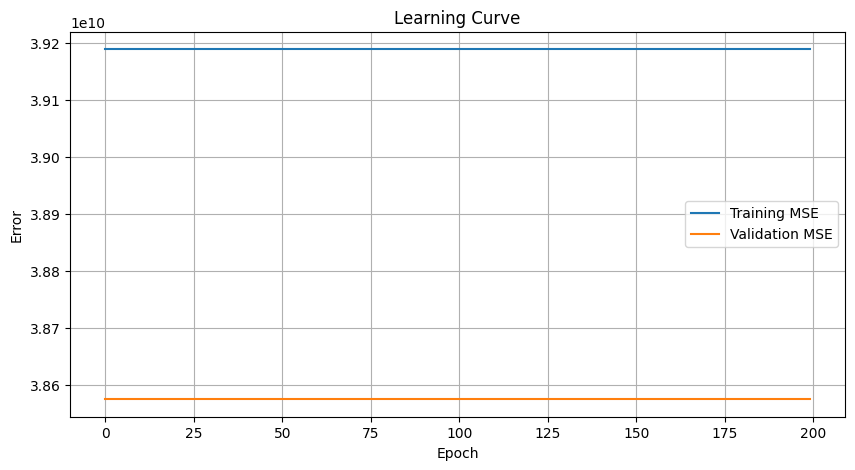

In [53]:
import matplotlib.pyplot as plt

loss = nn.loss_epochs()

plt.figure(figsize=(10,5))
plt.plot(loss[:,0], label="Training MSE")
plt.plot(loss[:,1], label="Validation MSE")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title("Learning Curve")
plt.legend()
plt.grid()
plt.show()


In [54]:
df = df.fillna(df.median(numeric_only=True))


In [55]:
#Normalization

y = df["SalePrice"].values
y_mean = y.mean()
y_std = y.std()

y = (y - y_mean) / y_std


In [56]:
nn.fit(X, y)
loss = nn.loss_epochs()
print(loss[-1])


[1.97921665 2.08313338]


In [57]:
import pandas as pd
import numpy as np
from NeuronalNet import NeuralNet

df = pd.read_csv("AmesHousing_preprocessing_FINAL.csv")

# 1. Fix missing data
df = df.fillna(df.median(numeric_only=True))

# 2. Convert everything to float
df = df.astype(float)

# 3. Separate X and y
X = df.drop(columns=["SalePrice"]).values
y = df["SalePrice"].values

# 4. Normalize inputs
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X = (X - X_mean) / X_std

# 5. Normalize output
y_mean = y.mean()
y_std = y.std()
y = (y - y_mean) / y_std

# 6. Train neural network
nn = NeuralNet(
    n_units=[X.shape[1], 64, 32, 16, 1],
    epochs=200,
    lr=0.001,
    momentum=0.9,
    activation="tanh",
    val_pct=0.2,
    batch_size=32,
    random_state=42
)

nn.fit(X, y)

loss = nn.loss_epochs()
print("Train Loss:", loss[-1,0])
print("Valid Loss:", loss[-1,1])


Train Loss: 0.28594323325030335
Valid Loss: 0.30999136332057464


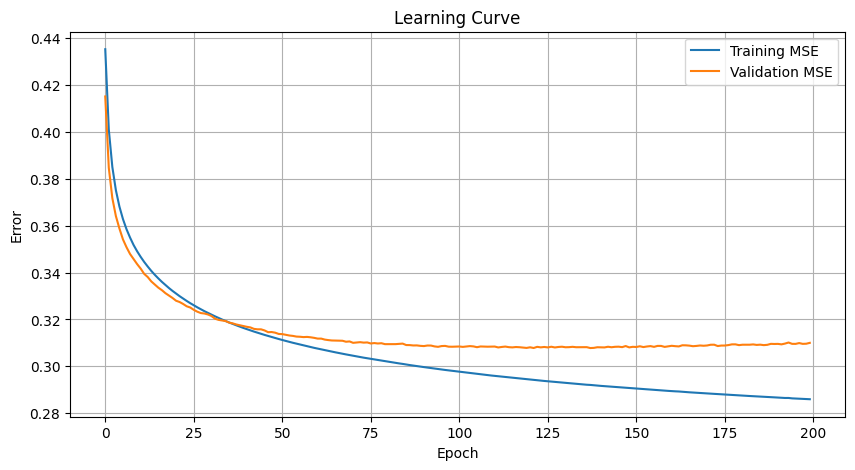

In [58]:
# Graphics

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(loss[:,0], label="Training MSE")
plt.plot(loss[:,1], label="Validation MSE")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title("Learning Curve")
plt.legend()
plt.grid()
plt.show()
